# scaling.ipynb
This notebook reads in timing information from Parallel SnowModel output files executed using different domains

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Functions

In [25]:
def get_parameter(stringtofind,parpath):
    with open(parpath) as f:
        for line in f:
            li = line.strip()
            if not li.startswith("!"):
                if stringtofind in li:
                    blah = li.replace(" ","")
                    var = float(blah.split(":",1)[1])
                    f.close()
                    return var

In [26]:
def get_parameter2(stringtofind,parpath):
    with open(parpath) as f:
        for line in f:
            li = line.strip()
            if not li.startswith("!"):
                if stringtofind in li:
                    blah = li.replace(" ","")
                    var = int(blah.split("=",1)[1])
                    f.close()
                    return var

In [27]:
!pwd

/glade/work/rossamower/snowmodel/git_paper/Parallel-SnowModel/analysis/scaling/outputs/365_day/python


In [28]:

## get list of git commit hashes ##

domain_lst = os.listdir('../output_files/')

domain_lst


['tuolumne', 'idaho', 'conus', 'west_us', 'co_headwaters', 'pnw']

In [29]:
proc_lst = [1,2,4,8,16,36,52,72,144,288,576,1152,2304]
stringtofind = ['ReadParam Time','PreProc Time','Distribute Time','MicroMet Time','Enbal Time','SnowPack Time','SnowTran Time','SnowTran Comm Time','Gather Time','Master NonInit Time','Master Total Time']

## Loop through output and read timing values

In [30]:
domain_lst_2 = []
np_lst = []
readparam_lst = []
preproc_lst = []
micromet_lst = []
enbal_lst = []
snowpack_lst = []
snowtran_lst = []
output_lst = []
master_lst = []
master_noninit_lst = []

# proc_lst = [1,2,4,8,16,36,52,72,144,288,576,1152,2304]
proc_lst = [1,2,4,8,16,27,36,52,54,72,84,108,120,144,152,240,288,304,480,576,592,648,720,864,888,1152,1296,1728,1800,1944,2304,3456]

# proc_lst = [8,27,36,144,288,576,864]
# proc_lst = [27]


stringtofind = ['ReadParam Time','PreProc Time','Distribute Time','MicroMet Time','Enbal Time','SnowPack Time','SnowTran Time','SnowTran Comm Time','Gather Time','Master NonInit Time','Master Total Time']

base_dir = '../output_files/'
# domain_lst = os.listdir(base_dir)
domain_lst = ['tuolumne','co_headwaters','idaho','pnw','west_us','conus']
# domain_lst = ['idaho']


for domain in domain_lst:
    
    domain_dir = f'{base_dir}{domain}/'
    print(domain)
    
    for proc in proc_lst:
        # print(np_)
        proc_dir = f'{domain_dir}np_{proc}/'
        print(proc_dir)
        
        # try:
        isExists = os.path.exists(proc_dir)
        if isExists:
            
            for file in os.listdir(proc_dir):
                if '.out' in file:
                    try:
                        readparam_t_s = get_parameter('ReadParam Time',proc_dir+file) ## readparam time in seconds
                        preproc_t_s = get_parameter('PreProc Time',proc_dir+file) ## preproc time in seconds
                        micromet_t_s = get_parameter('MicroMet Time',proc_dir+file) ## miromet time in seconds
                        enbal_t_s = get_parameter('EnBal Time',proc_dir+file) ## enbal time in seconds
                        snowpack_t_s = get_parameter('SnowPack Time',proc_dir+file) ## snowpack time in seconds
                        snowtran_t_s = get_parameter('SnowTran Time',proc_dir+file) ## snowtran time in seconds
                        output_t_s = get_parameter('Output Time',proc_dir+file) ## output time in seconds
                        master_t_s = get_parameter('Master Total Time',proc_dir+file) ## master time in seconds
                        master_nonit_s = get_parameter('Master NonInit Time',proc_dir+file) ## master time in seconds
                    except:
                        readparam_t_s = -9999.0
                        preproc_t_s = -9999.0
                        micromet_t_s = -9999.0
                        enbal_t_s = -9999.0
                        snowpack_t_s = -9999.0
                        snowtran_t_s = -9999.0
                        output_t_s = -9999.0
                        master_t_s = -9999.0
                        master_nonit_s = -9999.0
                        proc = -9999.0
        else:
            readparam_t_s = -9999.0
            preproc_t_s = -9999.0
            micromet_t_s = -9999.0
            enbal_t_s = -9999.0
            snowpack_t_s = -9999.0
            snowtran_t_s = -9999.0
            output_t_s = -9999.0
            master_t_s = -9999.0
            master_nonit_s = -9999.0
            proc = -9999.0
                        
        # except:

        domain_lst_2.append(domain)
        np_lst.append(proc)
        readparam_lst.append(readparam_t_s)
        preproc_lst.append(preproc_t_s)
        micromet_lst.append(micromet_t_s)
        enbal_lst.append(enbal_t_s)
        snowpack_lst.append(snowpack_t_s)
        snowtran_lst.append(snowtran_t_s)
        output_lst.append(output_t_s)
        master_lst.append(master_t_s)
        master_noninit_lst.append(master_nonit_s)

tuolumne
../output_files/tuolumne/np_1/
../output_files/tuolumne/np_2/
../output_files/tuolumne/np_4/
../output_files/tuolumne/np_8/
../output_files/tuolumne/np_16/
../output_files/tuolumne/np_27/
../output_files/tuolumne/np_36/
../output_files/tuolumne/np_52/
../output_files/tuolumne/np_54/
../output_files/tuolumne/np_72/
../output_files/tuolumne/np_84/
../output_files/tuolumne/np_108/
../output_files/tuolumne/np_120/
../output_files/tuolumne/np_144/
../output_files/tuolumne/np_152/
../output_files/tuolumne/np_240/
../output_files/tuolumne/np_288/
../output_files/tuolumne/np_304/
../output_files/tuolumne/np_480/
../output_files/tuolumne/np_576/
../output_files/tuolumne/np_592/
../output_files/tuolumne/np_648/
../output_files/tuolumne/np_720/
../output_files/tuolumne/np_864/
../output_files/tuolumne/np_888/
../output_files/tuolumne/np_1152/
../output_files/tuolumne/np_1296/
../output_files/tuolumne/np_1728/
../output_files/tuolumne/np_1800/
../output_files/tuolumne/np_1944/
../output_f

## create dataframe 

In [31]:
df_master = pd.DataFrame({'domain':domain_lst_2,
                  'num_proc':np_lst,
                  'readparam':readparam_lst,
                   'preproc':preproc_lst,
                   'micromet':micromet_lst,
                   'enbal':enbal_lst,
                   'snowpack':snowpack_lst,
                   'snowtran':snowtran_lst,
                   'output':output_lst,
                   'total':master_lst,
                  }
                 )
df_master



,domain,num_proc,readparam,preproc,micromet,enbal,snowpack,snowtran,output,total
0,tuolumne,1.0,0.002208,0.178943,601.028931,58.707333,87.195343,26.077970,11.423367,784.927002
1,tuolumne,2.0,0.002265,0.073755,310.084045,29.416489,44.208099,13.481577,5.630421,403.197998
2,tuolumne,4.0,0.002282,0.033849,163.971542,14.892907,22.135050,6.507595,2.660630,210.327164
3,tuolumne,8.0,0.002313,0.090596,90.824364,7.575693,11.630379,3.727767,1.458382,115.387428
4,tuolumne,16.0,0.002733,0.095827,53.583000,3.762703,5.897007,2.460089,0.738379,66.705627
...,...,...,...,...,...,...,...,...,...,...
187,conus,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
188,conus,1800.0,0.003745,241.680847,16417.222700,655.133728,930.881470,3520.463380,321.006775,22236.779300
189,conus,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
190,conus,2304.0,0.003435,188.563293,14791.105500,530.566040,736.365417,3193.171880,297.457031,19809.671900


#### pull out nx and ny from domains

In [32]:
tu_nx = get_parameter2('nx','../output_files/tuolumne/np_1/sm_parallel_tuol_1.out') ## readparam time in seconds
tu_ny = get_parameter2('ny','../output_files/tuolumne/np_1/sm_parallel_tuol_1.out') ## readparam time in seconds

# ## colorado headwaters memory ##
co_nx = get_parameter2('nx','../output_files/co_headwaters/np_8/sm_parallel_co_8.out')
co_ny = get_parameter2('ny','../output_files/co_headwaters/np_8/sm_parallel_co_8.out')

## idaho memory ##
id_nx = get_parameter2('nx','../output_files/idaho/np_576/sm_parallel_idaho_576.out')
id_ny = get_parameter2('ny','../output_files/idaho/np_576/sm_parallel_idaho_576.out')

# ## colorado headwaters memory ##
pnw_nx = get_parameter2('nx','../output_files/pnw/np_120/sm_parallel_pnw_120.out')
pnw_ny = get_parameter2('ny','../output_files/pnw/np_120/sm_parallel_pnw_120.out')

# # ## colorado headwaters memory ##
west_nx = get_parameter2('nx','../output_files/west_us/np_2304/sm_parallel_west_2304.out')
west_ny = get_parameter2('ny','../output_files/west_us/np_2304/sm_parallel_west_2304.out')

# ## colorado headwaters memory ##
conus_nx = get_parameter2('nx','../output_files/conus/np_3456/sm_parallel_conus_3456.out')
conus_ny = get_parameter2('ny','../output_files/conus/np_3456/sm_parallel_conus_3456.out')

## clean dataframe

In [33]:
def speedup(df):
    """
        Calculate speedup T1/TN
    """

    min_proc = df.num_proc.min()
    
    serial_t = df[df['num_proc'] == min_proc]['total'].values
    # serial_nt = df[df['num_proc'] == min_proc]['noninit_total'].values
    
    ## calculate speedup ##
    df['rel_speedup'] = serial_t / df['total']
    df['approx_speedup'] = (serial_t / df['total']) * min_proc
    
    ## calculate efficiency ##
    df['rel_efficiency'] = (df['rel_speedup'] / df['num_proc']) * 100
    df['approx_efficiency'] = (df['approx_speedup'] / df['num_proc']) * 100
    # df['speedup_t_rel'] = serial_t / df['total']
    # df['speedup_nt'] = serial_nt / df['noninit_total']
    
    
    df.sort_values(by = 'num_proc',inplace = True)
    return df

In [34]:
# ## convert num_proc to int column ##
# df_master['num_proc'] = df_master['num_proc'].astype(int)
## replace -9999.0 with nan ##
df_master.replace(-9999.0,np.nan,inplace = True)

## separate dataframes for each git version ##
df_tu = df_master[df_master['domain'] == 'tuolumne']
df_co = df_master[df_master['domain'] == 'co_headwaters']
df_id = df_master[df_master['domain'] == 'idaho']
df_pnw = df_master[df_master['domain'] == 'pnw']
df_west = df_master[df_master['domain'] == 'west_us']
df_conus = df_master[df_master['domain'] == 'conus']
## calculate speedup from total and noninit##
df_tu = speedup(df_tu)
df_co = speedup(df_co)
df_id = speedup(df_id)
df_pnw = speedup(df_pnw)
df_west = speedup(df_west)
df_conus = speedup(df_conus)

/glade/derecho/scratch/rossamower/tmp/ipykernel_11715/1424138162.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rel_speedup'] = serial_t / df['total']
/glade/derecho/scratch/rossamower/tmp/ipykernel_11715/1424138162.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approx_speedup'] = (serial_t / df['total']) * min_proc
/glade/derecho/scratch/rossamower/tmp/ipykernel_11715/1424138162.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [35]:
df_conus

,domain,num_proc,readparam,preproc,micromet,enbal,snowpack,snowtran,output,total,rel_speedup,approx_speedup,rel_efficiency,approx_efficiency
181,conus,648.0,0.002967,605.631958,30822.9277,1800.618290,2551.967530,6032.19922,1024.240110,43062.5273,1.000000,648.000000,0.154321,100.000000
183,conus,864.0,0.004099,456.164703,24940.9434,1341.109010,1868.910520,4671.12500,731.361511,34190.0547,1.259504,816.158907,0.145776,94.462837
186,conus,1296.0,0.003289,303.835968,19704.0664,899.254761,1272.864750,3947.92700,478.750763,26715.5371,1.611891,1044.505210,0.124374,80.594538
188,conus,1800.0,0.003745,241.680847,16417.2227,655.133728,930.881470,3520.46338,321.006775,22236.7793,1.936545,1254.881263,0.107586,69.715626
190,conus,2304.0,0.003435,188.563293,14791.1055,530.566040,736.365417,3193.17188,297.457031,19809.6719,2.173813,1408.630987,0.094350,61.138498
191,conus,3456.0,0.003911,136.313522,12312.2168,366.686707,513.689331,2909.29053,222.282852,16509.5781,2.608336,1690.201744,0.075473,48.906300
160,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
def plot_rel_speedup(df,domain):
    ideal_scale = df['num_proc'] / df['num_proc'].min()
    
    fig,ax = plt.subplots()
    df.plot('num_proc','rel_speedup',color = 'black',style = '-*',ax=ax)
    plt.plot(df['num_proc'],ideal_scale,'--k',label = 'ideal scaling')
    plt.ylabel('Relative Speedup\n' + f'T({int(df["num_proc"].min())})/T(N)',fontweight = 'bold')
    plt.xlabel('Number of Processors', fontweight = 'bold')
    # plt.ylim(0,600)
    plt.xlim(0,df['num_proc'].max())
    plt.title(f'{domain} Speedup')
    plt.show()
    return

def plot_approx_speedup(df,domain):
    ideal_scale = df['num_proc'] / df['num_proc'].min()
    
    fig,ax = plt.subplots()
    df.plot('num_proc','rel_speedup',color = 'black',style = '-*',ax=ax)
    plt.plot(df['num_proc'],ideal_scale,'--k',label = 'ideal scaling')
    plt.ylabel('Relative Speedup\n' + f'T({int(df["num_proc"].min())})/T(N)',fontweight = 'bold')
    plt.xlabel('Number of Processors', fontweight = 'bold')
    # plt.ylim(0,600)
    plt.xlim(0,df['num_proc'].max())
    plt.title(f'{domain} Speedup')
    plt.show()
    return
    

In [37]:
def plot_rel_efficiency(df,domain):
    # ideal_scale = df['num_proc'] / df['num_proc'].min()
    
    ## calculate efficiency ##
    # df['efficiency_t'] = (df['speedup_t'] / df['num_proc']) * int(df['num_proc'].min()) * 100
    # df['efficiency_nt'] = (df['speedup_nt'] / df['num_proc']) * int(df['num_proc'].min()) * 100
    
    fig,ax = plt.subplots()
    df.plot('num_proc','approx_efficiency',color = 'black',style = '-*',ax=ax)
    # plt.plot(df['num_proc'],ideal_scale,'--k',label = 'ideal scaling')
    plt.ylabel('Relative Efficiency\n' + f'(S*T1)/N',fontweight = 'bold')
    plt.xlabel('Number of Processors', fontweight = 'bold')
    # plt.ylim(0,600)
    plt.xlim(0,df['num_proc'].max())
    plt.title(f'{domain} Efficiency')
    plt.show()
    return df

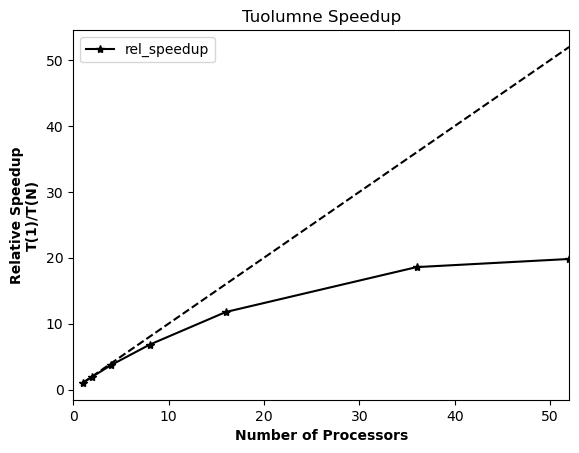

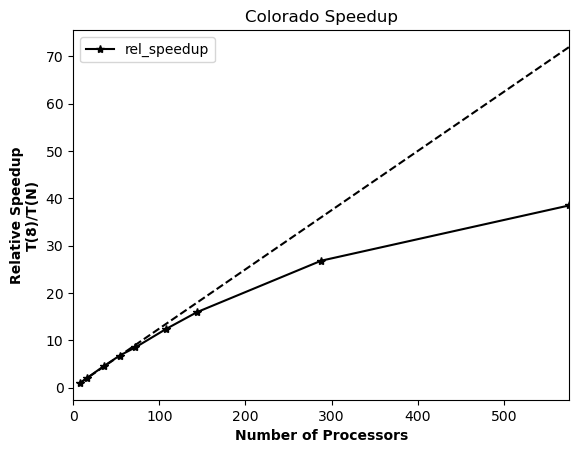

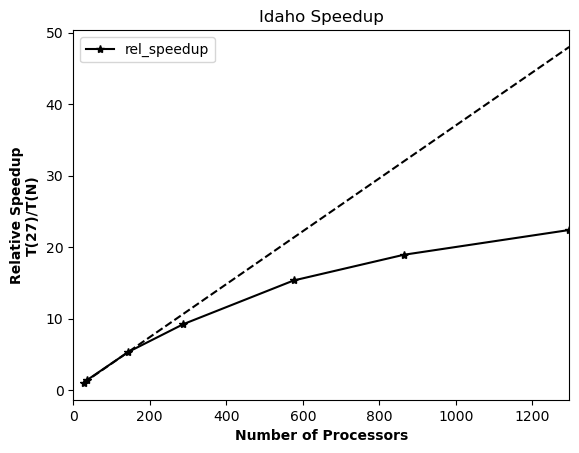

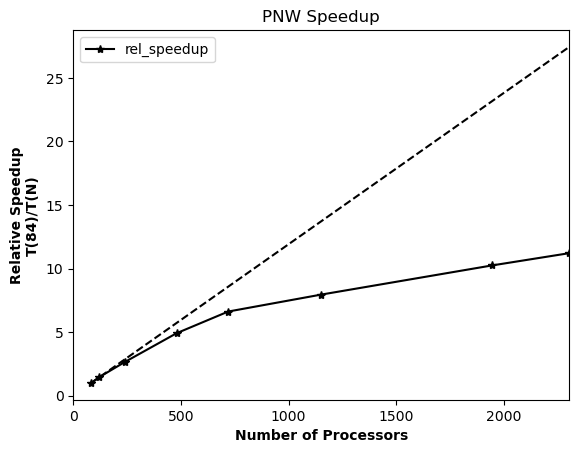

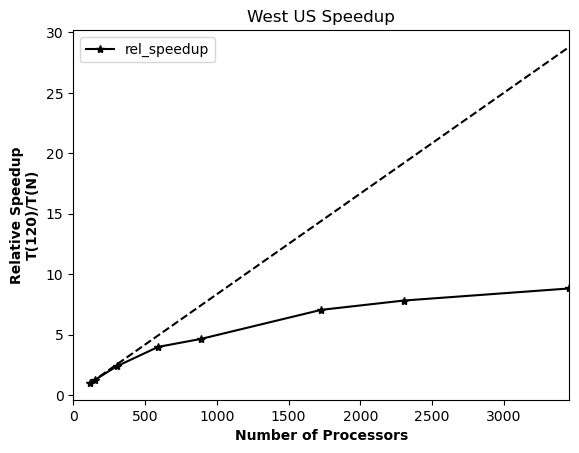

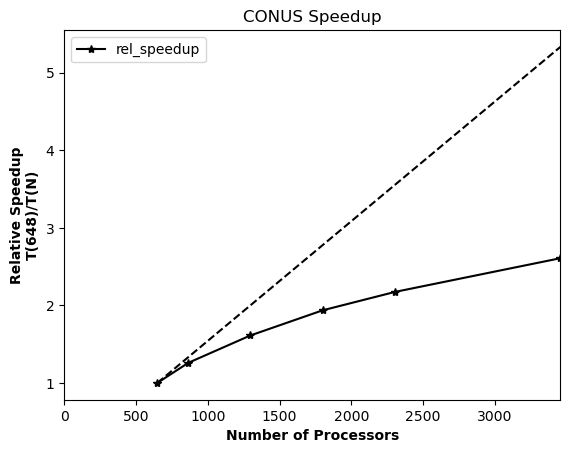

In [38]:
plot_rel_speedup(df_tu,'Tuolumne')
plot_rel_speedup(df_co,'Colorado')
plot_rel_speedup(df_id,'Idaho')
plot_rel_speedup(df_pnw,'PNW')
plot_rel_speedup(df_west,'West US')
plot_rel_speedup(df_conus,'CONUS')

In [39]:
df_conus

,domain,num_proc,readparam,preproc,micromet,enbal,snowpack,snowtran,output,total,rel_speedup,approx_speedup,rel_efficiency,approx_efficiency
181,conus,648.0,0.002967,605.631958,30822.9277,1800.618290,2551.967530,6032.19922,1024.240110,43062.5273,1.000000,648.000000,0.154321,100.000000
183,conus,864.0,0.004099,456.164703,24940.9434,1341.109010,1868.910520,4671.12500,731.361511,34190.0547,1.259504,816.158907,0.145776,94.462837
186,conus,1296.0,0.003289,303.835968,19704.0664,899.254761,1272.864750,3947.92700,478.750763,26715.5371,1.611891,1044.505210,0.124374,80.594538
188,conus,1800.0,0.003745,241.680847,16417.2227,655.133728,930.881470,3520.46338,321.006775,22236.7793,1.936545,1254.881263,0.107586,69.715626
190,conus,2304.0,0.003435,188.563293,14791.1055,530.566040,736.365417,3193.17188,297.457031,19809.6719,2.173813,1408.630987,0.094350,61.138498
191,conus,3456.0,0.003911,136.313522,12312.2168,366.686707,513.689331,2909.29053,222.282852,16509.5781,2.608336,1690.201744,0.075473,48.906300
160,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
print(pnw_nx,pnw_ny)
print(west_nx,west_ny)

13677 16058
17737 17878


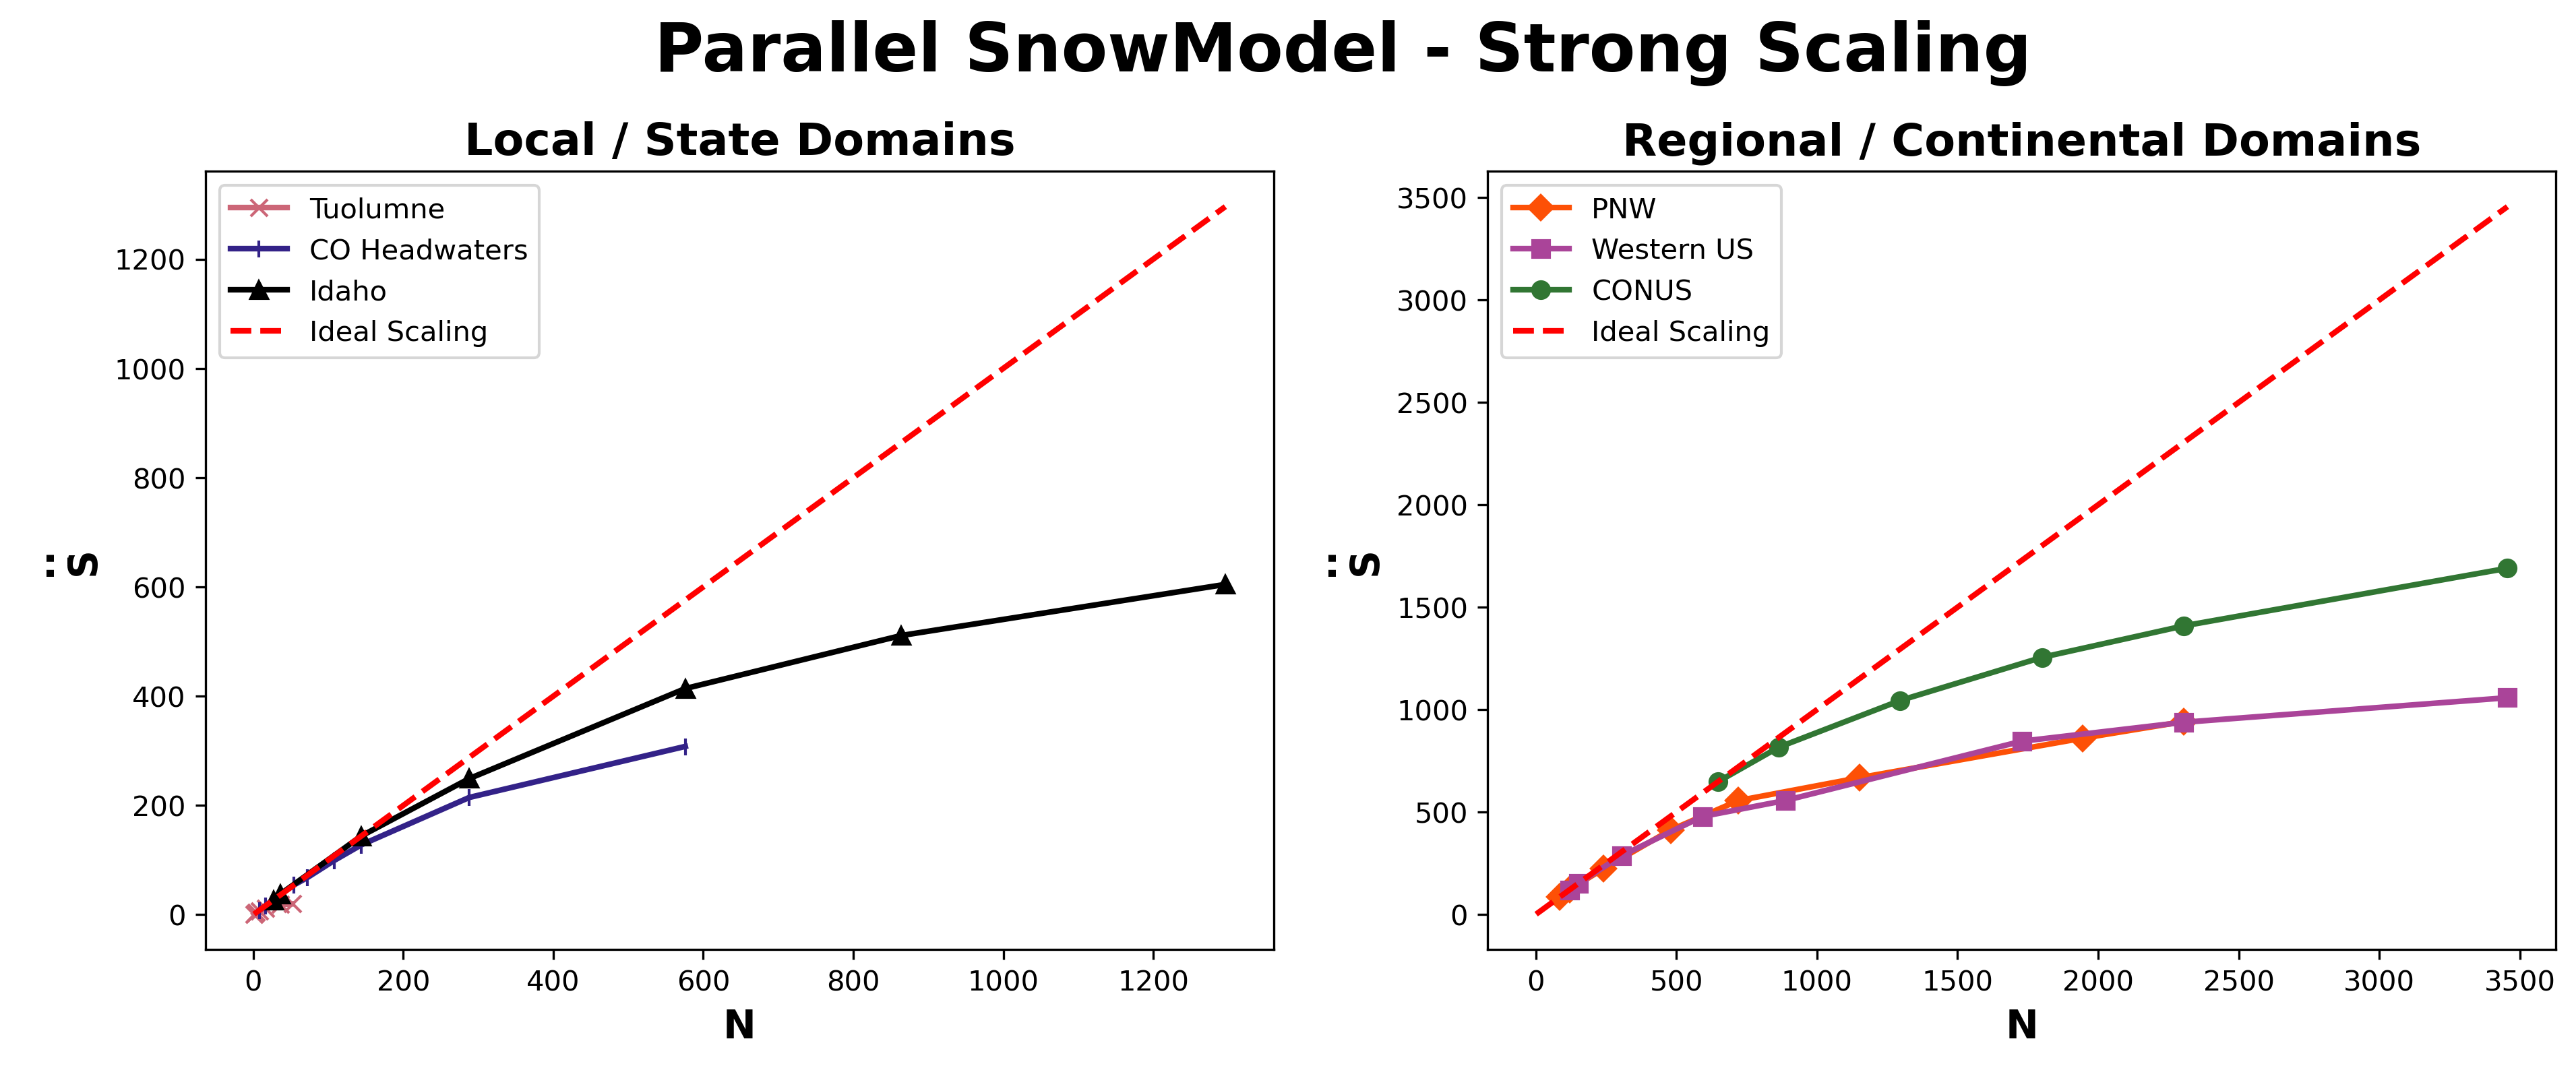

In [110]:
x_embar = [1,1296]
y_embar = [1,1296]
dot = '\u0307'
fig,ax = plt.subplots(1,2,figsize = (15,5),dpi = 300)
# plt.figure(facecolor='white')
ax[0].plot(df_tu.num_proc,df_tu.approx_speedup,label = 'Tuolumne',marker = 'x',color = '#CC6677',linewidth = 2)
ax[0].plot(df_co.num_proc,df_co.approx_speedup,label = 'CO Headwaters',marker = '|',color = '#332288',linewidth = 2)
ax[0].plot(df_id.num_proc,df_id.approx_speedup,label = 'Idaho',marker = '^',color = 'black',linewidth = 2)
ax[0].plot(x_embar,y_embar,color = 'red',linestyle = 'dashed',label = 'Ideal Scaling',linewidth = 2)
ax[0].set_xlabel('N',fontweight = 'bold',fontsize = 14)
ax[0].set_ylabel('Approximate Speedup',fontweight = 'bold',fontsize = 14)
# ax[0].set_ylabel('Approximate Speedup \n'+r'[T($\hat{P}$)/T(N) * $\hat{P}$]',fontweight = 'bold',fontsize = 12)
# ax[0].set_ylabel('Approximate Speedup '+'S'+dot,fontweight = 'bold',fontsize = 16)
ax[0].set_ylabel('..\nS'+dot,fontweight = 'bold',fontsize = 14)

ax[0].legend()
# ax[0].set_title('Strong Scaling\n Local / State Domains',fontweight = 'bold',fontsize = 16)
ax[0].set_title('Local / State Domains',fontweight = 'bold',fontsize = 16)


x_embar = [1,3456]
y_embar = [1,3456]
# ax[1].plot(procs[0:13],idaho_sp[0:13],label = 'Idaho',marker = '^',color = 'black',linewidth = 2)
ax[1].plot(df_pnw.num_proc,df_pnw.approx_speedup,label = 'PNW',marker = 'D',color = '#FD5006',linewidth = 2)
ax[1].plot(df_west.num_proc,df_west.approx_speedup,label = 'Western US',marker = 's',color = '#AA4499',linewidth = 2)
ax[1].plot(df_conus.num_proc,df_conus.approx_speedup,label = 'CONUS',marker = 'o',color ='#317633',linewidth = 2)
ax[1].plot(x_embar,y_embar,color = 'red',linestyle = 'dashed',label = 'Ideal Scaling',linewidth = 2)
# ax[1].set_xlabel('Number of Processes',fontweight = 'bold',fontsize = 14)
ax[1].set_xlabel('N',fontweight = 'bold',fontsize = 14)
ax[1].set_ylabel('..\nS',fontweight = 'bold',fontsize = 14)
# ax[1].set_ylabel('Approximate Speedup \n'+r'[T$\hat{1}$/Tn]',fontweight = 'bold',fontsize = 12)
# ax[1].set_title('Strong Scaling\n Regional / Continental Domains',fontweight = 'bold',fontsize = 16)
ax[1].set_title('Regional / Continental Domains',fontweight = 'bold',fontsize = 16)

ax[1].legend()
plt.suptitle('Parallel SnowModel - Strong Scaling', y = 1.03,fontweight = 'bold',fontsize = 24)
plt.savefig('speedup.png',dpi=300,bbox_inches = "tight")

In [42]:
# dot = '\u07f3'
dot = '\u0307'
print('S' + dot)

Ṡ


In [43]:
df_pnw

,domain,num_proc,readparam,preproc,micromet,enbal,snowpack,snowtran,output,total,rel_speedup,approx_speedup,rel_efficiency,approx_efficiency
106,pnw,84.0,0.002572,218.340103,29439.72660,2618.826170,3710.939450,5001.707520,856.409424,42217.83980,1.000000,84.000000,1.190476,100.000000
108,pnw,120.0,0.002311,129.173065,20535.40040,1819.921750,2519.398680,3233.174800,692.168213,29198.44920,1.445893,121.455031,1.204911,101.212526
111,pnw,240.0,0.002739,57.985912,11404.95610,915.582886,1299.794430,1868.876950,323.724060,15942.65530,2.648106,222.440897,1.103377,92.683707
114,pnw,480.0,0.002563,33.804306,5946.87305,465.468262,662.724792,1249.393550,198.258484,8601.02734,4.908465,412.311042,1.022597,85.898134
118,pnw,720.0,0.002420,29.915842,4480.38330,314.301361,439.474030,949.514404,136.573868,6382.33398,6.614796,555.642897,0.918722,77.172625
121,pnw,1152.0,0.004910,13.098732,3606.55273,191.612808,268.075531,1115.069820,90.591446,5311.79492,7.947942,667.627157,0.689926,57.953746
125,pnw,1944.0,0.003389,7.634838,2952.32080,123.220993,173.532425,783.716980,61.167896,4123.88184,10.237403,859.941841,0.526615,44.235691
126,pnw,2304.0,0.004066,18.175888,2691.22241,95.771462,136.415680,761.504333,42.387596,3767.42285,11.206026,941.306215,0.486373,40.855304
96,pnw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,pnw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_west

,domain,num_proc,readparam,preproc,micromet,enbal,snowpack,snowtran,output,total,rel_speedup,approx_speedup,rel_efficiency,approx_efficiency
140,west_us,120.0,0.002270,322.530975,30298.59570,2560.027590,3442.124270,4881.025390,919.554565,42722.76560,1.000000,120.000000,0.833333,100.000000
142,west_us,152.0,0.002349,318.336151,23896.49220,2035.715700,2769.578120,3805.952880,798.894897,33846.51170,1.262250,151.470022,0.830428,99.651330
145,west_us,304.0,0.002558,142.835220,12727.65720,1017.966550,1382.677730,2139.276860,392.665314,17934.67970,2.382132,285.855781,0.783596,94.031507
148,west_us,592.0,0.002720,60.988365,7776.32910,536.046265,734.347534,1357.134520,222.979095,10728.71480,3.982095,477.851445,0.672651,80.718150
152,west_us,888.0,0.003248,61.869949,6746.34326,361.871765,490.961334,1362.520140,151.575638,9217.19824,4.635114,556.213693,0.521972,62.636677
155,west_us,1728.0,0.002855,34.237369,4340.74268,189.916870,258.120087,1127.258300,86.986015,6063.35449,7.046061,845.527320,0.407758,48.930979
158,west_us,2304.0,0.004330,25.952078,3935.38550,138.643555,188.374451,1091.567990,64.640350,5465.78516,7.816400,937.968054,0.339253,40.710419
159,west_us,3456.0,0.003224,33.205845,3646.94141,104.612480,139.382996,850.344849,56.104969,4845.97559,8.816133,1057.935967,0.255096,30.611573
128,west_us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,west_us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='num_proc'>

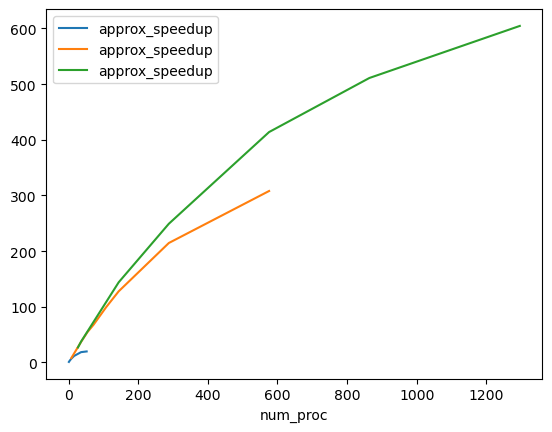

In [45]:
fig,ax = plt.subplots()
df_tu.plot('num_proc','approx_speedup',ax=ax)
df_co.plot('num_proc','approx_speedup',ax=ax)
df_id.plot('num_proc','approx_speedup',ax=ax)

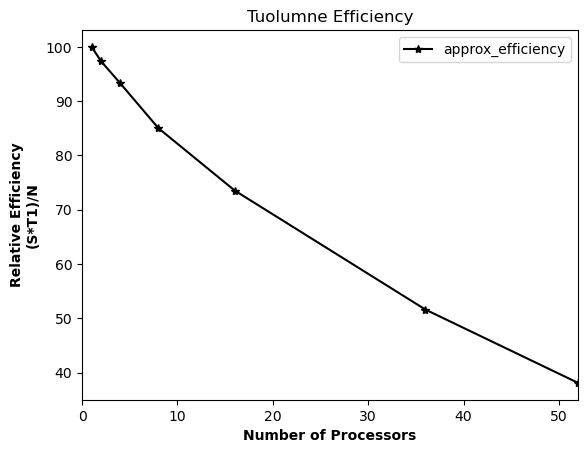

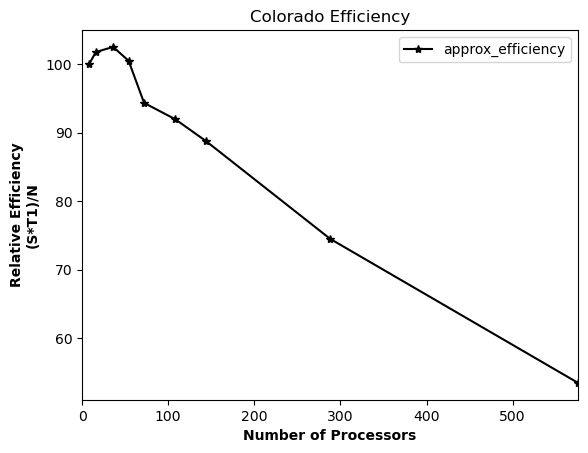

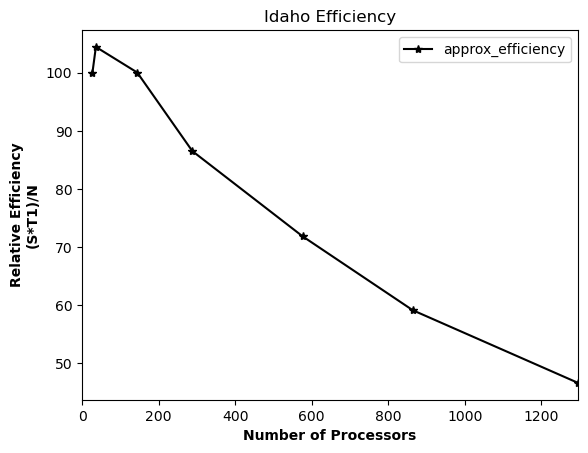

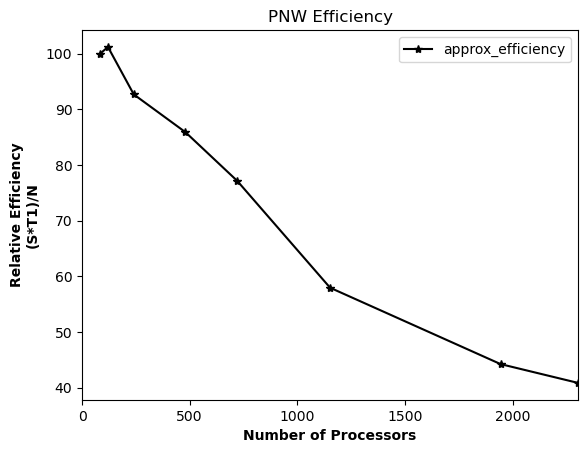

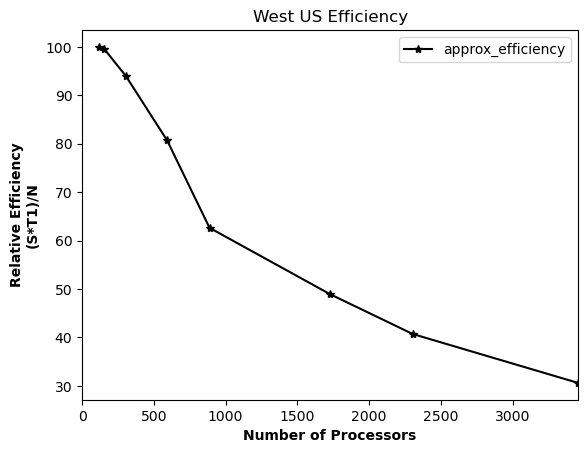

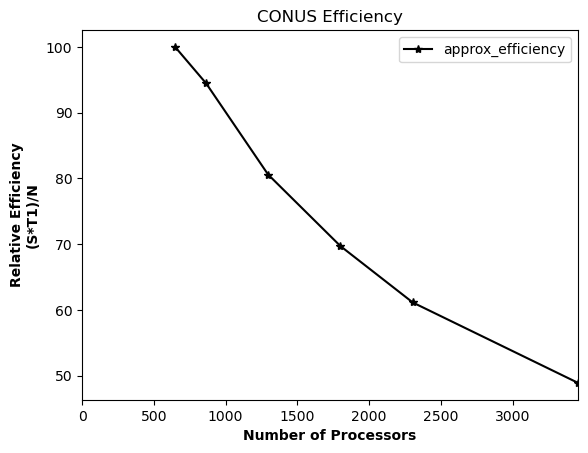

In [46]:
df_tu = plot_rel_efficiency(df_tu,'Tuolumne')
df_co = plot_rel_efficiency(df_co,'Colorado')
df_id = plot_rel_efficiency(df_id,'Idaho')
df_pnw = plot_rel_efficiency(df_pnw,'PNW')
df_west = plot_rel_efficiency(df_west,'West US')
df_conus = plot_rel_efficiency(df_conus,'CONUS')

In [47]:
df_tu

,domain,num_proc,readparam,preproc,micromet,enbal,snowpack,snowtran,output,total,rel_speedup,approx_speedup,rel_efficiency,approx_efficiency
0,tuolumne,1.0,0.002208,0.178943,601.028931,58.707333,87.195343,26.077970,11.423367,784.927002,1.000000,1.000000,100.000000,100.000000
1,tuolumne,2.0,0.002265,0.073755,310.084045,29.416489,44.208099,13.481577,5.630421,403.197998,1.946753,1.946753,97.337661,97.337661
2,tuolumne,4.0,0.002282,0.033849,163.971542,14.892907,22.135050,6.507595,2.660630,210.327164,3.731934,3.731934,93.298339,93.298339
3,tuolumne,8.0,0.002313,0.090596,90.824364,7.575693,11.630379,3.727767,1.458382,115.387428,6.802535,6.802535,85.031686,85.031686
4,tuolumne,16.0,0.002733,0.095827,53.583000,3.762703,5.897007,2.460089,0.738379,66.705627,11.767028,11.767028,73.543927,73.543927
6,tuolumne,36.0,0.002501,0.117287,34.231197,1.883458,2.976145,2.348140,0.457757,42.246529,18.579680,18.579680,51.610224,51.610224
7,tuolumne,52.0,0.002883,0.203582,31.560585,1.247584,1.972331,3.930709,0.301859,39.616356,19.813206,19.813206,38.102318,38.102318
5,tuolumne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,tuolumne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,tuolumne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_co

,domain,num_proc,readparam,preproc,micromet,enbal,snowpack,snowtran,output,total,rel_speedup,approx_speedup,rel_efficiency,approx_efficiency
35,co_headwaters,8.0,0.002846,17.653738,22504.445300,2074.504150,3078.730960,4971.647950,784.897278,33608.730500,1.000000,8.000000,12.500000,100.000000
36,co_headwaters,16.0,0.002662,9.356801,11325.550800,1037.521240,1526.136470,2110.475590,410.461975,16509.539100,2.035716,16.285727,12.723224,101.785793
38,co_headwaters,36.0,0.002912,4.787727,5118.322270,461.969177,683.835205,797.985718,156.522156,7284.101070,4.613985,36.911877,12.816624,102.532992
40,co_headwaters,54.0,0.003749,2.954160,3497.464110,308.081940,454.930298,522.532104,105.770576,4953.777830,6.784465,54.275717,12.563823,100.510587
41,co_headwaters,72.0,0.004619,2.493282,2787.927490,232.788773,339.903259,449.738586,93.740379,3957.687010,8.492013,67.936106,11.794463,94.355703
43,co_headwaters,108.0,0.002991,1.726078,1887.373900,153.915451,228.910233,336.571014,61.711521,2706.398190,12.418250,99.346003,11.498380,91.987040
45,co_headwaters,144.0,0.004591,1.924433,1480.735720,115.571953,171.918900,256.179626,53.837898,2103.285890,15.979155,127.833237,11.096635,88.773081
48,co_headwaters,288.0,0.004796,1.013478,897.665222,57.553162,83.285187,160.064789,25.954920,1252.770020,26.827534,214.620273,9.315116,74.520928
51,co_headwaters,576.0,0.003005,0.442702,611.693542,28.741857,41.780857,141.044159,14.021278,872.805542,38.506550,308.052402,6.685165,53.481320
32,co_headwaters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_id

,domain,num_proc,readparam,preproc,micromet,enbal,snowpack,snowtran,output,total,rel_speedup,approx_speedup,rel_efficiency,approx_efficiency
69,idaho,27.0,0.003610,67.928451,26054.45900,2388.974610,3125.470700,5712.008790,865.611389,38435.33200,1.000000,27.000000,3.703704,100.000000
70,idaho,36.0,0.002712,49.508266,19127.80860,1788.156010,2321.536870,3573.949460,616.538391,27604.38670,1.392363,37.593806,3.867676,104.427239
77,idaho,144.0,0.002945,11.832359,5196.54199,454.626434,590.784912,764.659241,146.471863,7204.58105,5.334846,144.040848,3.704754,100.028367
80,idaho,288.0,0.002997,6.853267,2965.02222,227.527954,294.840729,556.978333,92.036934,4164.84961,9.228504,249.169613,3.204342,86.517227
83,idaho,576.0,0.003545,3.853691,1777.77539,113.542969,146.940582,398.637665,44.732880,2506.97827,15.331338,413.946134,2.661691,71.865648
87,idaho,864.0,0.003625,8.033495,1468.06128,77.584206,99.583328,330.395233,34.618290,2030.63062,18.927781,511.050091,2.190715,59.149316
90,idaho,1296.0,0.002873,9.818591,1246.69910,56.710693,73.205833,298.867401,22.498692,1716.51196,22.391532,604.571356,1.727742,46.649024
64,idaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,idaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,idaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_pnw

,domain,num_proc,readparam,preproc,micromet,enbal,snowpack,snowtran,output,total,rel_speedup,approx_speedup,rel_efficiency,approx_efficiency
106,pnw,84.0,0.002572,218.340103,29439.72660,2618.826170,3710.939450,5001.707520,856.409424,42217.83980,1.000000,84.000000,1.190476,100.000000
108,pnw,120.0,0.002311,129.173065,20535.40040,1819.921750,2519.398680,3233.174800,692.168213,29198.44920,1.445893,121.455031,1.204911,101.212526
111,pnw,240.0,0.002739,57.985912,11404.95610,915.582886,1299.794430,1868.876950,323.724060,15942.65530,2.648106,222.440897,1.103377,92.683707
114,pnw,480.0,0.002563,33.804306,5946.87305,465.468262,662.724792,1249.393550,198.258484,8601.02734,4.908465,412.311042,1.022597,85.898134
118,pnw,720.0,0.002420,29.915842,4480.38330,314.301361,439.474030,949.514404,136.573868,6382.33398,6.614796,555.642897,0.918722,77.172625
121,pnw,1152.0,0.004910,13.098732,3606.55273,191.612808,268.075531,1115.069820,90.591446,5311.79492,7.947942,667.627157,0.689926,57.953746
125,pnw,1944.0,0.003389,7.634838,2952.32080,123.220993,173.532425,783.716980,61.167896,4123.88184,10.237403,859.941841,0.526615,44.235691
126,pnw,2304.0,0.004066,18.175888,2691.22241,95.771462,136.415680,761.504333,42.387596,3767.42285,11.206026,941.306215,0.486373,40.855304
96,pnw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,pnw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_west

,domain,num_proc,readparam,preproc,micromet,enbal,snowpack,snowtran,output,total,rel_speedup,approx_speedup,rel_efficiency,approx_efficiency
140,west_us,120.0,0.002270,322.530975,30298.59570,2560.027590,3442.124270,4881.025390,919.554565,42722.76560,1.000000,120.000000,0.833333,100.000000
142,west_us,152.0,0.002349,318.336151,23896.49220,2035.715700,2769.578120,3805.952880,798.894897,33846.51170,1.262250,151.470022,0.830428,99.651330
145,west_us,304.0,0.002558,142.835220,12727.65720,1017.966550,1382.677730,2139.276860,392.665314,17934.67970,2.382132,285.855781,0.783596,94.031507
148,west_us,592.0,0.002720,60.988365,7776.32910,536.046265,734.347534,1357.134520,222.979095,10728.71480,3.982095,477.851445,0.672651,80.718150
152,west_us,888.0,0.003248,61.869949,6746.34326,361.871765,490.961334,1362.520140,151.575638,9217.19824,4.635114,556.213693,0.521972,62.636677
155,west_us,1728.0,0.002855,34.237369,4340.74268,189.916870,258.120087,1127.258300,86.986015,6063.35449,7.046061,845.527320,0.407758,48.930979
158,west_us,2304.0,0.004330,25.952078,3935.38550,138.643555,188.374451,1091.567990,64.640350,5465.78516,7.816400,937.968054,0.339253,40.710419
159,west_us,3456.0,0.003224,33.205845,3646.94141,104.612480,139.382996,850.344849,56.104969,4845.97559,8.816133,1057.935967,0.255096,30.611573
128,west_us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,west_us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_conus

,domain,num_proc,readparam,preproc,micromet,enbal,snowpack,snowtran,output,total,rel_speedup,approx_speedup,rel_efficiency,approx_efficiency
181,conus,648.0,0.002967,605.631958,30822.9277,1800.618290,2551.967530,6032.19922,1024.240110,43062.5273,1.000000,648.000000,0.154321,100.000000
183,conus,864.0,0.004099,456.164703,24940.9434,1341.109010,1868.910520,4671.12500,731.361511,34190.0547,1.259504,816.158907,0.145776,94.462837
186,conus,1296.0,0.003289,303.835968,19704.0664,899.254761,1272.864750,3947.92700,478.750763,26715.5371,1.611891,1044.505210,0.124374,80.594538
188,conus,1800.0,0.003745,241.680847,16417.2227,655.133728,930.881470,3520.46338,321.006775,22236.7793,1.936545,1254.881263,0.107586,69.715626
190,conus,2304.0,0.003435,188.563293,14791.1055,530.566040,736.365417,3193.17188,297.457031,19809.6719,2.173813,1408.630987,0.094350,61.138498
191,conus,3456.0,0.003911,136.313522,12312.2168,366.686707,513.689331,2909.29053,222.282852,16509.5781,2.608336,1690.201744,0.075473,48.906300
160,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
from scipy import interpolate

In [54]:
df_conus

,domain,num_proc,readparam,preproc,micromet,enbal,snowpack,snowtran,output,total,rel_speedup,approx_speedup,rel_efficiency,approx_efficiency
181,conus,648.0,0.002967,605.631958,30822.9277,1800.618290,2551.967530,6032.19922,1024.240110,43062.5273,1.000000,648.000000,0.154321,100.000000
183,conus,864.0,0.004099,456.164703,24940.9434,1341.109010,1868.910520,4671.12500,731.361511,34190.0547,1.259504,816.158907,0.145776,94.462837
186,conus,1296.0,0.003289,303.835968,19704.0664,899.254761,1272.864750,3947.92700,478.750763,26715.5371,1.611891,1044.505210,0.124374,80.594538
188,conus,1800.0,0.003745,241.680847,16417.2227,655.133728,930.881470,3520.46338,321.006775,22236.7793,1.936545,1254.881263,0.107586,69.715626
190,conus,2304.0,0.003435,188.563293,14791.1055,530.566040,736.365417,3193.17188,297.457031,19809.6719,2.173813,1408.630987,0.094350,61.138498
191,conus,3456.0,0.003911,136.313522,12312.2168,366.686707,513.689331,2909.29053,222.282852,16509.5781,2.608336,1690.201744,0.075473,48.906300
160,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,conus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
def interp(df,effic):
    try:
        f = interpolate.interp1d(x = df.approx_efficiency, y = df.num_proc)
        return float(f(effic))
    except:
        return df['num_proc'].max()


In [56]:
tu_eff_50 = interp(df_tu,50)
co_eff_50 = interp(df_co,50)
id_eff_50 = interp(df_id,50)
pnw_eff_50 = interp(df_pnw,50)
west_eff_50 = interp(df_west,50)
conus_eff_50 = interp(df_conus,50)

In [57]:
tu_eff_50

37.90729619075093

In [58]:
df_tu

,domain,num_proc,readparam,preproc,micromet,enbal,snowpack,snowtran,output,total,rel_speedup,approx_speedup,rel_efficiency,approx_efficiency
0,tuolumne,1.0,0.002208,0.178943,601.028931,58.707333,87.195343,26.077970,11.423367,784.927002,1.000000,1.000000,100.000000,100.000000
1,tuolumne,2.0,0.002265,0.073755,310.084045,29.416489,44.208099,13.481577,5.630421,403.197998,1.946753,1.946753,97.337661,97.337661
2,tuolumne,4.0,0.002282,0.033849,163.971542,14.892907,22.135050,6.507595,2.660630,210.327164,3.731934,3.731934,93.298339,93.298339
3,tuolumne,8.0,0.002313,0.090596,90.824364,7.575693,11.630379,3.727767,1.458382,115.387428,6.802535,6.802535,85.031686,85.031686
4,tuolumne,16.0,0.002733,0.095827,53.583000,3.762703,5.897007,2.460089,0.738379,66.705627,11.767028,11.767028,73.543927,73.543927
6,tuolumne,36.0,0.002501,0.117287,34.231197,1.883458,2.976145,2.348140,0.457757,42.246529,18.579680,18.579680,51.610224,51.610224
7,tuolumne,52.0,0.002883,0.203582,31.560585,1.247584,1.972331,3.930709,0.301859,39.616356,19.813206,19.813206,38.102318,38.102318
5,tuolumne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,tuolumne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,tuolumne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
eff_proc = [tu_eff_50,co_eff_50,id_eff_50,pnw_eff_50,west_eff_50,conus_eff_50]
num_grid = [tu_nx * tu_ny,
            co_nx * co_ny,
            id_nx * id_ny,
            pnw_nx * pnw_ny,
            west_nx * west_ny,
            conus_nx * conus_ny]
num_ny = [tu_ny,
          co_ny,
          id_ny,
          pnw_ny,
          west_ny,
          conus_ny
         ]
num_nx = [tu_nx,
          co_nx,
          id_nx,
          pnw_nx,
          west_nx,
          conus_nx
         ]

In [60]:
np.array(num_ny)/eff_proc

array([ 4.88032697,  8.97048611,  7.71653459,  9.96646825, 10.75380422,
        8.42827844])

Text(0, 0.5, 'Number of processors')

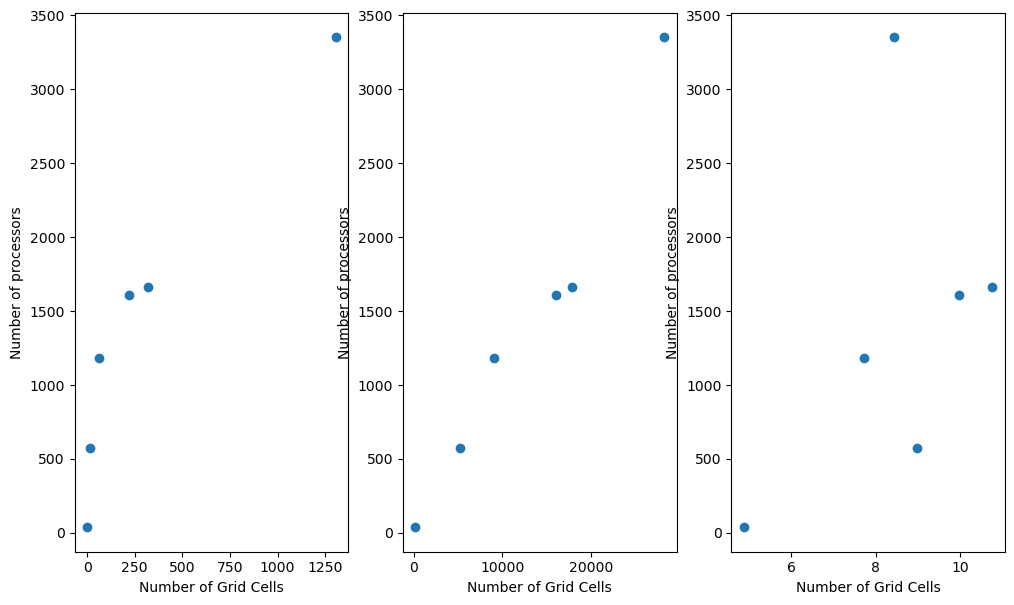

In [61]:
fig,ax = plt.subplots(1,3,figsize = (12,7))
ax[0].scatter(np.array(num_grid)/1000000,eff_proc)
ax[0].set_xlabel('Number of Grid Cells')
ax[0].set_ylabel('Number of processors')
# ax[0].set_xlim(0,500)

ax[1].scatter(np.array(num_ny),eff_proc)
ax[1].set_xlabel('Number of Grid Cells')
ax[1].set_ylabel('Number of processors')

ax[2].scatter(np.array(num_ny)/eff_proc,eff_proc)
ax[2].set_xlabel('Number of Grid Cells')
ax[2].set_ylabel('Number of processors')

[595.86765133]
[8.67850416]


Text(0, 0.5, 'Number of processors')

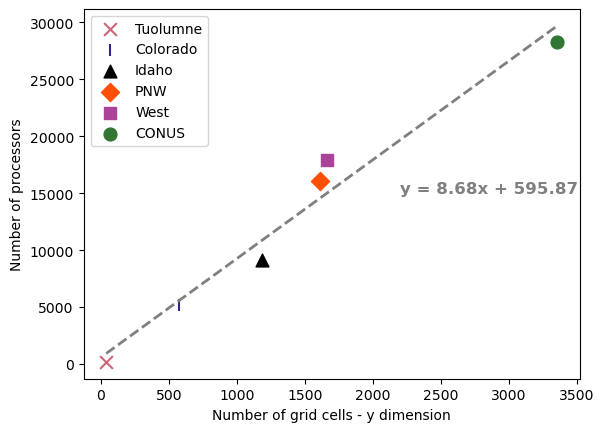

In [62]:
from sklearn.linear_model import LinearRegression
marker_lst = ['x','|','^','D','s','o']
color_lst = ['#CC6677','#332288','black','#FD5006','#AA4499','#317633']
label_lst = ['Tuolumne','Colorado','Idaho','PNW','West','CONUS']


# equation = 'y = ' + str(round(float(lm.coef_),4)) + 'x' ' + ' + str(round(float(lm.intercept_[0],4))


X, Y = np.array(eff_proc).reshape(-1,1), np.array(num_ny).reshape(-1,1)
lm = LinearRegression()
lm.fit(X, Y)

print(lm.intercept_)
print(lm.coef_[0])
eq = f'y = {float(lm.coef_[0]):.2f}x + {float(lm.intercept_):.2f}'
# plt.plot( X, LinearRegression().fit(X, Y).predict(X) )
                                                                    
fig,ax = plt.subplots()
plt.plot( X, LinearRegression().fit(X, Y).predict(X),'--',color = 'gray' ,linewidth = 2)
for i in range(0,len(marker_lst)):
    
    # ax.scatter(np.array(num_ny)[i],eff_proc[i],label = label_lst[i],marker = marker_lst[i],color = color_lst[i],s = 75)
    ax.scatter(eff_proc[i],np.array(num_ny)[i],label = label_lst[i],marker = marker_lst[i],color = color_lst[i],s = 85)
ax.annotate(eq,xy=(2200, 15000),color = 'gray',fontsize = 12,fontweight='bold')
plt.legend()
# plt.plot( X, LinearRegression().fit(X, Y).predict(X),'--',color = 'gray' ,linewidth = 2)
plt.xlabel('Number of grid cells - y dimension')
plt.ylabel('Number of processors')

In [63]:
np.array(eff_proc).shape

(6,)

In [64]:
np.array(num_ny).shape

(6,)

In [65]:
num_ny

[185, 5167, 9107, 16058, 17878, 28260]

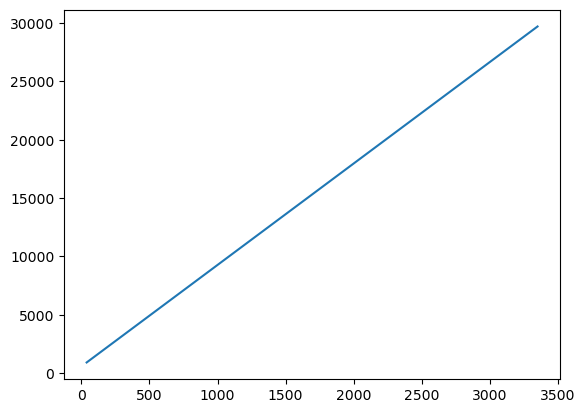

In [66]:
from sklearn.linear_model import LinearRegression

X, Y = np.array(eff_proc).reshape(-1,1), np.array(num_ny).reshape(-1,1)
plt.plot( X, LinearRegression().fit(X, Y).predict(X) )

In [67]:
lm = LinearRegression()
lm.fit(X, Y)

print(lm.intercept_)
print(lm.coef_)

[595.86765133]
[[8.67850416]]


In [97]:
def efficiency_v_ny(efficiency,df_tu,df_co,df_id,df_pnw,df_west,df_conus,num_ny,PlotLinReg):
    ## constants ##
    marker_lst = ['x','|','^','D','s','o']
    color_lst = ['#CC6677','#332288','black','#FD5006','#AA4499','#317633']
    label_lst = ['Tuolumne','CO Headwaters','Idaho','PNW','Western US','CONUS']
    
    tu_eff = interp(df_tu,efficiency)
    co_eff = interp(df_co,efficiency)
    id_eff = interp(df_id,efficiency)
    pnw_eff = interp(df_pnw,efficiency)
    west_eff = interp(df_west,efficiency)
    conus_eff = interp(df_conus,efficiency)
    
    eff_proc = [tu_eff,co_eff,id_eff,pnw_eff,west_eff,conus_eff]


    X, Y = np.array(num_ny).reshape(-1,1), np.array(eff_proc).reshape(-1,1)
    lm = LinearRegression()
    lm.fit(X, Y)
    print(lm.intercept_)
    print(lm.coef_[0])
    eq = f'y = {float(lm.coef_[0]):.2f}x + {float(lm.intercept_):.2f}'
    
    fig,ax=plt.subplots(dpi = 300)
    plt.plot( X, LinearRegression().fit(X, Y).predict(X),'--',color = 'gray' ,linewidth = 2)
    for i in range(0,len(marker_lst)):
    
        ax.scatter(np.array(num_ny)[i],eff_proc[i],label = label_lst[i],marker = marker_lst[i],color = color_lst[i],s = 75)
        # ax.scatter(eff_proc[i],np.array(num_ny)[i],label = label_lst[i],marker = marker_lst[i],color = color_lst[i],s = 75)

    plt.legend()

    # if PlotLinReg == 1:
    # ax.annotate(eq,xy=(18800, 1900),color = 'gray',fontsize = 12,fontweight='bold')
    # ax.annotate(eq,xy=(18800, 10),color = 'gray',fontsize = 12,fontweight = 'bold')
    plt.xlabel('Ny',fontweight = 'bold',fontsize = 12)
    plt.ylabel('N',fontweight = 'bold',fontsize = 12)
    ax.set_title(f'Grid Cells per Domain',fontweight = 'bold',fontsize = 14) 
    left, bottom, width, height = [0.65, 0.20, 0.2, 0.2]
    ax2 = fig.add_axes([left, bottom, width, height])
    for i in range(0,len(marker_lst)):
    
        ax2.scatter(np.array(num_ny)[i]/eff_proc[i],eff_proc[i],label = label_lst[i],marker = marker_lst[i],color = color_lst[i],s = 20)
    # ax[2].scatter(np.array(num_ny)/eff_proc,eff_proc)
    ax2.set_xlim(0,20)
    # ax2.set_xlabel('$\boldsymbol\l_{ny}$',fontweight = 'bold',fontsize = 7)
    ax2.set_xlabel(r'$\bf {l_{ny}}$')
    ax2.set_ylabel('N',fontweight = 'bold',fontsize = 7)
    ax2.set_title('Grid Cells per Process',fontweight = 'bold',fontsize = 8)
    ax2.tick_params(axis='both', which='major', labelsize=7)
    # ax2.plot(range(6)[::-1], color='green')
    # plt.tight_layout()
    plt.suptitle(f'{efficiency}% Parallel Efficiency',horizontalalignment = 'center',verticalalignment = 'top',fontweight = 'bold',fontsize = 20)
    plt.savefig(f'domain_decomp_{efficiency}_efficiency_w_inset.png',dpi = 300,bbox_inches = "tight")
    plt.show()
    return
    

In [69]:
# plt.suptitle?

[-21.79915115]
[0.11155929]


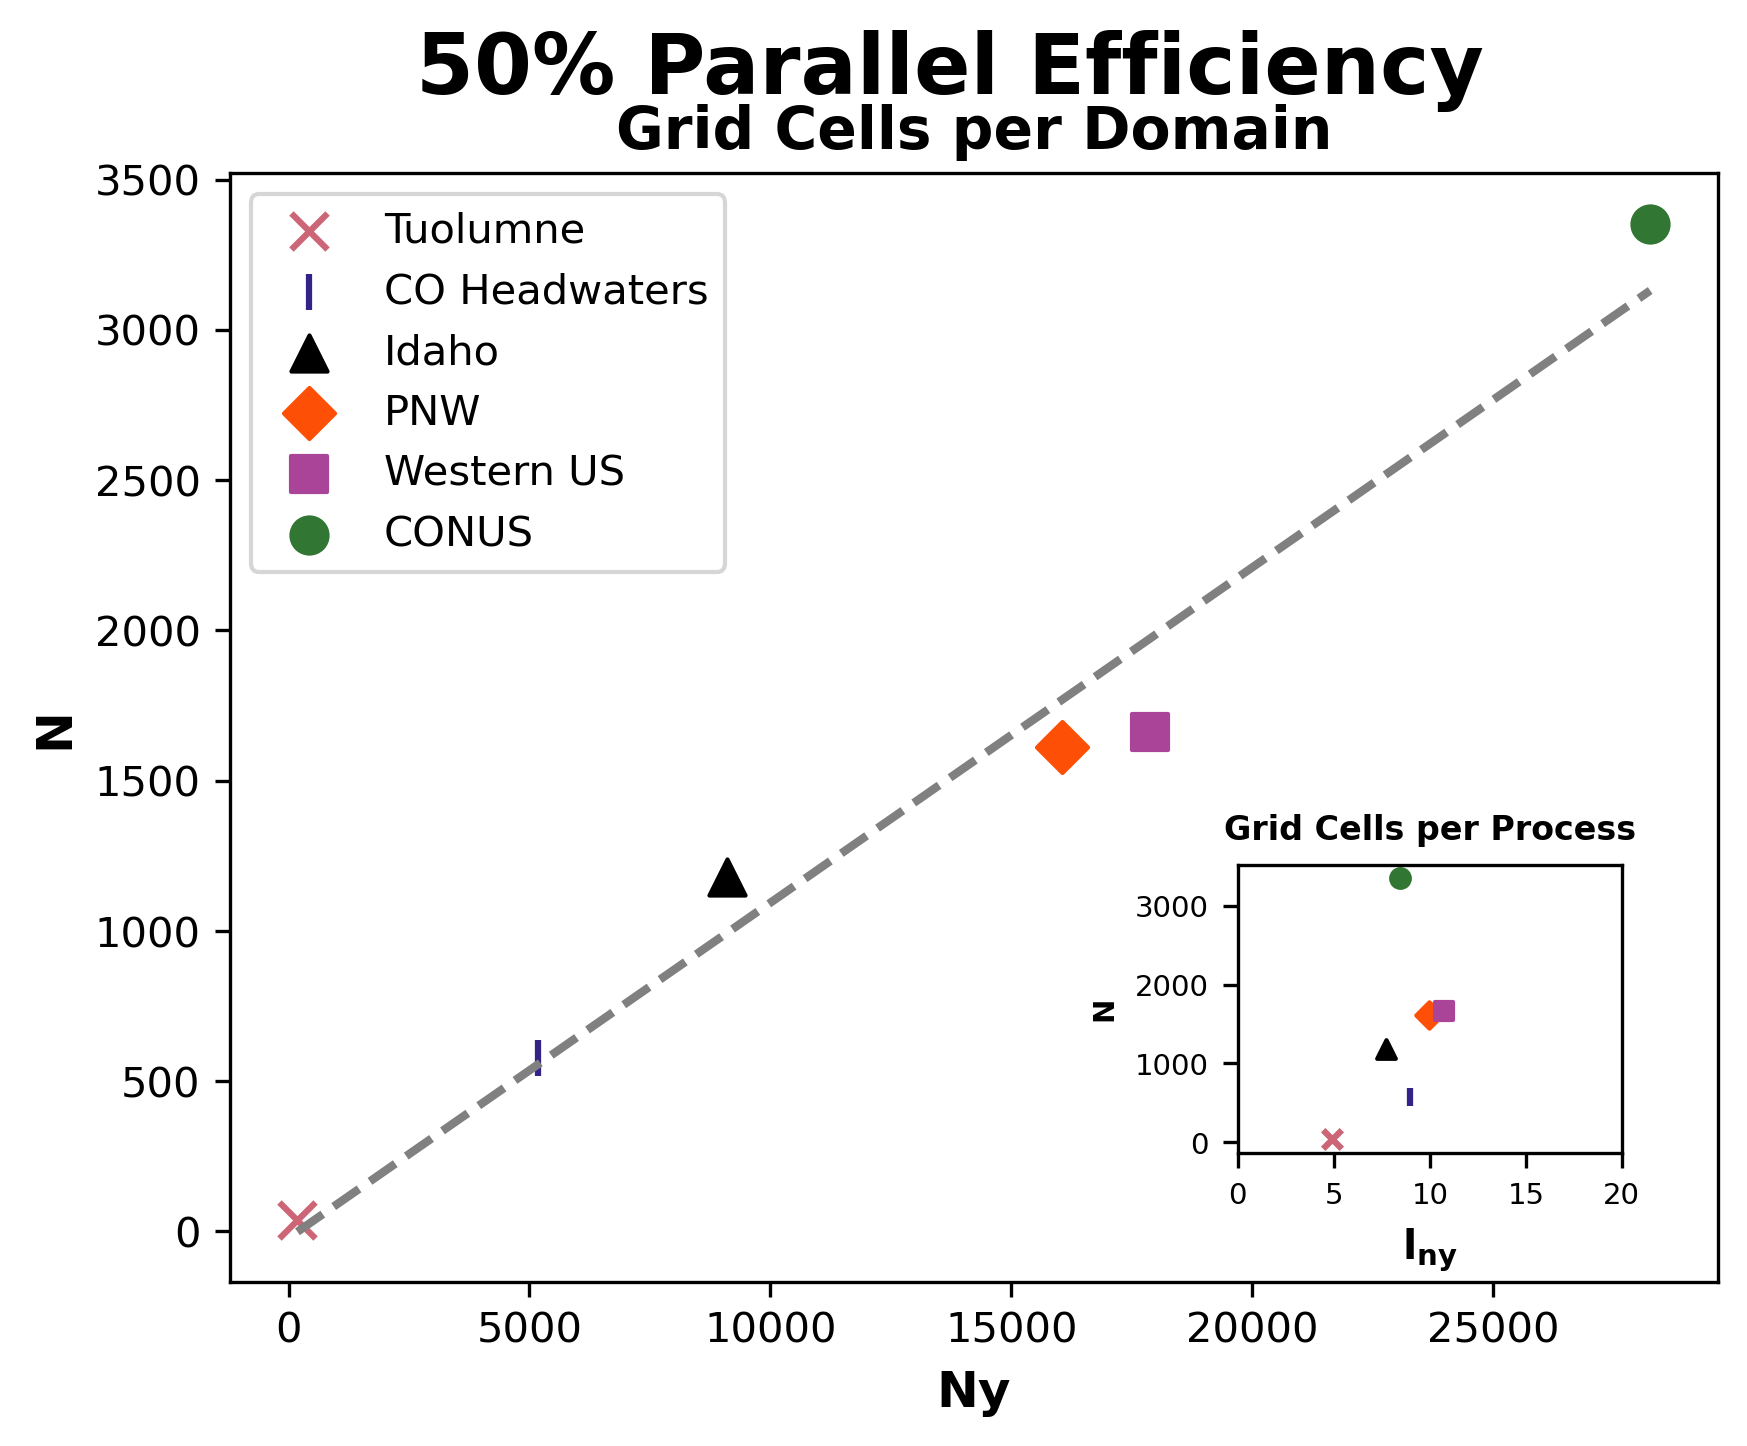

In [98]:
efficiency_v_ny(50,df_tu,df_co,df_id,df_pnw,df_west,df_conus,num_ny,1)

In [ ]:
efficiency_v_ny(50,df_tu,df_co,df_id,df_pnw,df_west,df_conus,num_ny,0)

In [ ]:
num_nx

In [ ]:
df_conus

In [ ]:
df_pnw

In [ ]:
df_tu

In [ ]:
plt.scatter(np.array(num_ny) / np.array(num_nx),eff_proc)
plt.xlabel('Number of Grid Cells')
plt.ylabel('Number of processors')

In [ ]:
fig,ax = plt.subplots()
plt.scatter(np.array(num_ny),eff_proc)
plt.xlabel('Number of Grid Cells')
plt.ylabel('Number of processors')

In [ ]:
num_grid

In [ ]:
co_eff_50

In [ ]:
id_eff_50

In [ ]:
fig,ax = plt.subplots()


In [ ]:
df_tu

In [ ]:
df_co = plot_rel_efficiency(df_co,'Colorado')

In [ ]:
df_co

In [ ]:
(df_co['speedup_t'] / df_co['num_proc']) * int(df_co['num_proc'].min())

In [ ]:
plot_rel_speedup(df_tu,'Tuolumne')

In [ ]:
def plot_rel_speedup(df,domain):
    ideal_scale = df['num_proc'] / df['num_proc'].min()
    
    fig,ax = plt.subplots()
    df.plot('num_proc','speedup_t',color = 'black',style = '-*',ax=ax)
    plt.plot(df['num_proc'],ideal_scale,'--k',label = 'ideal scaling')
    plt.ylabel('Relative Speedup\n' + f'T({int(df["num_proc"].min())})/T(N)',fontweight = 'bold')
    plt.xlabel('Number of Processors', fontweight = 'bold')
    # plt.ylim(0,600)
    plt.xlim(0,df['num_proc'].max())
    plt.title(f'{domain} Speedup')
    plt.show()

In [ ]:
# ideal_scale = np.arange(df_co.num_proc.min(),df_co.num_proc.max()+df_co.num_proc.min(),df_co.num_proc.min())
ideal_scale = df_co['num_proc'] / df_co['num_proc'].min()

fig,ax = plt.subplots()
df_co.plot('num_proc','speedup_t',color = 'black',ax=ax)
plt.plot(df_co['num_proc'],ideal_scale,'--k')
# plt.ylim(0,600)
plt.xlim(0,600)

In [ ]:
np.arange(df_co.num_proc.min(),df_co.num_proc.max()+df_co.num_proc.min(),df_co.num_proc.min())

In [ ]:
df_co['speedup_t']*8

In [ ]:
fig,ax = plt.subplots()
ax.plot(df_co['num_proc'],(df_co['speedup_t']*8))
# df_co.plot('num_proc','speedup_t',color = 'black',ax=ax)
plt.plot([1,600],[1,600],'--k')
plt.ylim(0,600)
plt.xlim(0,600)

In [ ]:
# df_id

In [ ]:
# df_pnw

In [ ]:
# df_west

In [ ]:
# df_conus

## Plotting

### Local domain total vs. noninit

In [ ]:
x_embar = [1,1152]
y_embar = [1,1152]
fig,ax = plt.subplots(1,2,figsize = (15,5),dpi = 200)
## total speedup ##
ax[0].plot(df_tu.num_proc,df_tu.speedup_t,label = 'Tuolumne',marker = 'x',color = '#CC6677',linewidth = 2)
ax[0].plot(df_co.num_proc,df_co.speedup_t,label = 'Colorado',marker = '|',color = '#332288',linewidth = 2)
ax[0].plot(df_id.num_proc,df_id.speedup_t,label = 'Idaho',marker = '^',color = 'black',linewidth = 2)
ax[0].plot(x_embar,y_embar,color = 'red',linestyle = 'dashed',label = 'Ideal Scaling',linewidth = 2)
ax[0].set_xlabel('# Processors',fontweight = 'bold',fontsize = 12)
ax[0].set_ylabel('Speedup \n'+r'[T1/Tn]',fontweight = 'bold',fontsize = 12)
ax[0].legend()
# ax[0].set_title('Strong Scaling\n Local / State Domains',fontweight = 'bold',fontsize = 16)
ax[0].set_title('Local / State Domains\n Total speedup',fontweight = 'bold',fontsize = 16)

## noninit speedup ##
ax[1].plot(df_tu.num_proc,df_tu.speedup_nt,label = 'Tuolumne',marker = 'x',color = '#CC6677',linewidth = 2)
ax[1].plot(df_co.num_proc,df_co.speedup_nt,label = 'Colorado',marker = '|',color = '#332288',linewidth = 2)
ax[1].plot(df_id.num_proc,df_id.speedup_nt,label = 'Idaho',marker = '^',color = 'black',linewidth = 2)
ax[1].plot(x_embar,y_embar,color = 'red',linestyle = 'dashed',label = 'Ideal Scaling',linewidth = 2)
ax[1].set_xlabel('# Processors',fontweight = 'bold',fontsize = 12)
ax[1].set_ylabel('Speedup \n'+r'[T1/Tn]',fontweight = 'bold',fontsize = 12)
ax[1].legend()
# ax[0].set_title('Strong Scaling\n Local / State Domains',fontweight = 'bold',fontsize = 16)
ax[1].set_title('Local / State Domains\n Non initialization speedup',fontweight = 'bold',fontsize = 16)
# plt.suptitle('Parallel SnowModel - Strong Scaling', y = 1.03,fontweight = 'bold',fontsize = 24)

# x_embar = [1,2304]
# y_embar = [1,2304]
# # ax[1].plot(procs[0:13],idaho_sp[0:13],label = 'Idaho',marker = '^',color = 'black',linewidth = 2)
# ax[1].plot(procs,pnw_sp,label = 'PNW',marker = 'D',color = '#FD5006',linewidth = 2)
# ax[1].plot(procs,west_sp,label = 'West',marker = 's',color = '#AA4499',linewidth = 2)
# ax[1].plot(procs,conus_sp,label = 'Conus',marker = 'o',color ='#317633',linewidth = 2)
# ax[1].plot(x_embar,y_embar,color = 'red',linestyle = 'dashed',label = 'Ideal Scaling',linewidth = 2)
# ax[1].set_xlabel('# Processors',fontweight = 'bold',fontsize = 12)
# ax[1].set_ylabel('Approximate Speedup \n'+r'[T$\hat{1}$/Tn]',fontweight = 'bold',fontsize = 12)
# # ax[1].set_title('Strong Scaling\n Regional / Continental Domains',fontweight = 'bold',fontsize = 16)
# ax[1].set_title('Regional / Continental Domains',fontweight = 'bold',fontsize = 16)

# ax[1].legend()
# plt.suptitle('Parallel SnowModel - Strong Scaling', y = 1.03,fontweight = 'bold',fontsize = 24)

### convert relative speedup to approximate relative speedup

In [ ]:
df_pnw['speedup_a_t'] = df_pnw['speedup_t'] * 4
df_pnw['speedup_a_nt'] = df_pnw['speedup_nt'] * 4

df_west['speedup_a_t'] = df_west['speedup_t'] * 8
df_west['speedup_a_nt'] = df_west['speedup_nt'] * 8

df_conus['speedup_a_t'] = df_conus['speedup_t'] * 52
df_conus['speedup_a_nt'] = df_conus['speedup_nt'] * 52

### Regional total vs. noninit approximate relative speedup

In [ ]:
x_embar = [1,2304]
y_embar = [1,2304]
fig,ax = plt.subplots(1,2,figsize = (15,5),dpi = 200)
## total speedup ##
ax[0].plot(df_pnw.num_proc,df_pnw.speedup_a_t,label = 'PNW',marker = 'D',color = '#FD5006',linewidth = 2)
ax[0].plot(df_west.num_proc,df_west.speedup_a_t,label = 'West',marker = 's',color = '#AA4499',linewidth = 2)
ax[0].plot(df_conus.num_proc,df_conus.speedup_a_t,label = 'Conus',marker = 'o',color ='#317633',linewidth = 2)
ax[0].plot(x_embar,y_embar,color = 'red',linestyle = 'dashed',label = 'Ideal Scaling',linewidth = 2)
ax[0].set_xlabel('# Processors',fontweight = 'bold',fontsize = 12)
ax[0].set_ylabel('Approximate Relative Speedup \n'+r'[T$\hat{1}$/Tn]',fontweight = 'bold',fontsize = 12)
# ax[1].set_title('Strong Scaling\n Regional / Continental Domains',fontweight = 'bold',fontsize = 16)
ax[0].set_title('Regional / Continental Domains\nTotal speedup',fontweight = 'bold',fontsize = 16)
ax[0].legend()
## nonitialization speedup ##
ax[1].plot(df_pnw.num_proc,df_pnw.speedup_a_nt,label = 'PNW',marker = 'D',color = '#FD5006',linewidth = 2)
ax[1].plot(df_west.num_proc,df_west.speedup_a_nt,label = 'West',marker = 's',color = '#AA4499',linewidth = 2)
ax[1].plot(df_conus.num_proc,df_conus.speedup_a_nt,label = 'Conus',marker = 'o',color ='#317633',linewidth = 2)
ax[1].plot(x_embar,y_embar,color = 'red',linestyle = 'dashed',label = 'Ideal Scaling',linewidth = 2)
ax[1].set_xlabel('# Processors',fontweight = 'bold',fontsize = 12)
ax[1].set_ylabel('Approximate Speedup \n'+r'[T$\hat{1}$/Tn]',fontweight = 'bold',fontsize = 12)
# ax[1].set_title('Strong Scaling\n Regional / Continental Domains',fontweight = 'bold',fontsize = 16)
ax[1].set_title('Regional / Continental Domains\nNon initialization speedup',fontweight = 'bold',fontsize = 16)
ax[1].legend()

In [ ]:
df_tu

In [ ]:
df_conus

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (15,5),dpi = 300)
x_embar = [1,1152]
y_embar = [1,1152]
ax[0].plot(x_embar,y_embar,color = 'red',linestyle = 'dashed',label = 'Ideal Scaling',linewidth = 2)
ax[0].plot(df_tu.num_proc,df_tu.speedup_nt,label = 'Tuolumne',marker = 'x',color = '#CC6677',linewidth = 2)
ax[0].plot(df_co.num_proc,df_co.speedup_nt,label = 'Colorado',marker = '|',color = '#332288',linewidth = 2)
ax[0].plot(df_id.num_proc,df_id.speedup_nt,label = 'Idaho',marker = '^',color = 'black',linewidth = 2)
ax[0].set_xlabel('Number of Processes',fontweight = 'bold',fontsize = 12)
ax[0].set_ylabel('Speedup',fontweight = 'bold',fontsize = 12)
ax[0].legend()
# ax[0].set_title('Strong Scaling\n Local / State Domains',fontweight = 'bold',fontsize = 16)
ax[0].set_title('Local / State Domains',fontweight = 'bold',fontsize = 16)

x_embar = [1,2304]
y_embar = [1,2304]
ax[1].plot(x_embar,y_embar,color = 'red',linestyle = 'dashed',label = 'Ideal Scaling',linewidth = 2)
ax[1].plot(df_pnw.num_proc,df_pnw.speedup_a_nt,label = 'PNW',marker = 'D',color = '#FD5006',linewidth = 2)
ax[1].plot(df_west.num_proc,df_west.speedup_a_nt,label = 'West',marker = 's',color = '#AA4499',linewidth = 2)
ax[1].plot(df_conus.num_proc,df_conus.speedup_a_nt,label = 'Conus',marker = 'o',color ='#317633',linewidth = 2)
ax[1].set_xlabel('Number of Processes',fontweight = 'bold',fontsize = 12)
ax[1].set_ylabel('Approximate Speedup',fontweight = 'bold',fontsize = 12)
# ax[1].set_title('Strong Scaling\n Regional / Continental Domains',fontweight = 'bold',fontsize = 16)
ax[1].set_title('Regional / Continental Domains',fontweight = 'bold',fontsize = 16)
ax[1].legend()
plt.suptitle('Parallel SnowModel - Strong Scaling', y = 1.03,fontweight = 'bold',fontsize = 24)
# plt.tight_layout()
plt.savefig('speedup.jpg',bbox_inches='tight',dpi=300)